Binary Classification Model (Ford Vs Rest)
First we need to do the pre processing of the dataset. We have to run the code that will change all the names of the images in the folder in a sequential order such that its easier for us to make classes.

In [0]:
import os 
  
# Function to rename multiple files 
def main(): 
    i = 0
      
    for filename in os.listdir("C:/path to your folder/"): 
        dst ="Other." + str(i) + ".jpg"
        
        src ='C:path to your folder/'+ filename 
        dst ='C:path to your folder/'+ dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 
        i += 1
  
# Driver Code 
if __name__ == '__main__': 
      
    # Calling main() function 
    main() 

In [0]:
#importing our images from the folders
import glob
import numpy as np
np.random.seed(42)
Audi = [f for f in glob.glob("C:/Users/Neelam/Desktop/images/AUDI1_3/*.jpg")]
Ford = [f for f in glob.glob("C:/Users/Neelam/Desktop/images/FORD_597/*.jpg")]
len(Audi), len(Ford

In [0]:
#make training validation and test sets
import numpy as np
Audi_train = np.random.choice(Audi, size=150, replace=False)
Ford_train = np.random.choice(Ford, size=150, replace=False)
Audi = list(set(Audi) - set(Audi_train))
Ford = list(set(Ford) - set(Ford_train))

Audi_val = np.random.choice(Audi, size=25, replace=True)
Ford_val = np.random.choice(Ford, size=25, replace=True)
Audi = list(set(Audi) - set(Audi_val))
Ford = list(set(Ford) - set(Ford_val))

Audi_test = np.random.choice(Audi, size=25, replace=False)
Ford_test = np.random.choice(Ford, size=25, replace=False)

print('Audi datasets:', Audi_train.shape, Audi_val.shape, Audi_test.shape)
print('Ford datasets:', Ford_train.shape, Ford_val.shape, Ford_test.shape)


Audi datasets: (150,) (25,) (25,)
Ford datasets: (150,) (25,) (25,)


In [0]:
#saving it as a separate folder so its becomes easier to check later
import os
import sklearn
import shutil
train_dir = 'training_data'
val_dir = 'validation_data'
test_dir = 'test_data'

train_files = np.concatenate([Audi_train, Ford_train])
validate_files = np.concatenate([Audi_val, Ford_val])
test_files = np.concatenate([Audi_test, Ford_test])

os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

for fn in train_files:
    shutil.copy(fn, train_dir)

for fn in validate_files:
    shutil.copy(fn, val_dir)
    
for fn in test_files:
    shutil.copy(fn, test_dir)

In [0]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

Using TensorFlow backend.


In [0]:
#loading images and labeling it based on their classes
import glob

import os 
import PIL 
import shutil
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

IMG_DIM = (300,300)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files]


print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (300, 300, 300, 3) 	Validation dataset shape: (39, 300, 300, 3)


(300, 300, 3)


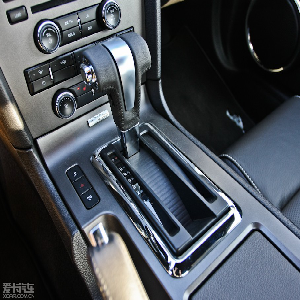

In [0]:
#scaling the images 
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [0]:
#setting the hyperparameter values
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (300,300,3)

#encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[90:190], train_labels_enc[90:190])

['Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other'] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 

In [0]:
#importing tensorflow and keras
import tensorflow

from keras.models import Model

In [0]:
#importing efficientnet model
from efficientnet import EfficientNetB0


from keras.models import Model
import keras

EN = EfficientNetB0(include_top=False, weights='imagenet',  input_shape=input_shape)

TypeError: 'numpy.int32' object is not iterable

In [0]:
#freezing the layers so its weights dont change for transfer learning
output = EN.layers[-1].output
output = keras.layers.Flatten()(output)
EN_model = Model(EN.input, output)

EN_model.trainable = False
for layer in EN_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in EN_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x0000020DCD99AC88>,input_2,False
1,<keras.layers.convolutional.Conv2D object at 0x0000020DCD99AE48>,conv2d_69,False
2,<keras.layers.normalization.BatchNormalization object at 0x0000020DCD99AA58>,batch_normalization_50,False
3,<efficientnet.layers.Swish object at 0x0000020DCD911550>,swish_50,False
4,<keras.layers.convolutional.DepthwiseConv2D object at 0x0000020DCD7A3198>,depthwise_conv2d_17,False
5,<keras.layers.normalization.BatchNormalization object at 0x0000020DCC8414A8>,batch_normalization_51,False
6,<efficientnet.layers.Swish object at 0x0000020DCC841B38>,swish_51,False
7,<keras.layers.core.Lambda object at 0x0000020DCC8BF6D8>,lambda_17,False
8,<keras.layers.convolutional.Conv2D object at 0x0000020DCC93A9B0>,conv2d_70,False
9,<efficientnet.layers.Swish object at 0x0000020DCC85D978>,swish_52,False


(1, 10, 10, 1280)


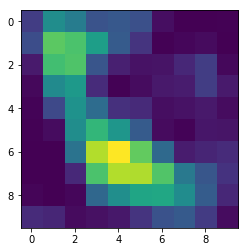

In [0]:
#bottleneck features
bottleneck_feature_example = EN.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [0]:
#extracting training and validation bottleneck features
def get_bottleneck_features(EN, input_imgs):
    features = EN.predict(input_imgs, verbose=0)
    return features
    
train_features_EN = get_bottleneck_features(EN_model, train_imgs_scaled)
validation_features_EN = get_bottleneck_features(EN_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_EN.shape, 
      '\tValidation Bottleneck Features:', validation_features_EN.shape)

Train Bottleneck Features: (300, 128000) 	Validation Bottleneck Features: (39, 128000)


In [0]:
#feeding it to our neural network
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = EN_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               65536512  
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 65,799,681
Trainable params: 65,799,681
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x=train_features_EN, y=train_labels_enc,
                    validation_data=(validation_features_EN, validation_labels_enc),
                    batch_size=300,
                    epochs=20,
                    verbose=1)

Train on 300 samples, validate on 39 samples
Epoch 1/20
300/300 [==============================] - 2s 8ms/step - loss: 0.0062 - acc: 0.9967 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 2/20
300/300 [==============================] - 2s 8ms/step - loss: 0.0081 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 3/20
300/300 [==============================] - 2s 7ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 4/20
300/300 [==============================] - 2s 7ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 5/20
300/300 [==============================] - 2s 8ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 6/20
300/300 [==============================] - 3s 8ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 7/20
300/300 [==============================] - 3s 11ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 8/20
300/300 [==========

In [0]:
#saving the model so we can load it later
model.save('Audi_Ford_tlearn_basic_cnn.h5')

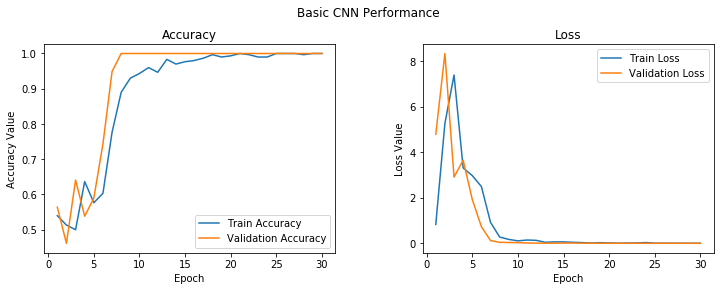

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
#pre processing on the test set
IMG_DIM = (300, 300)
num2class_label_transformer = lambda l: ['Ford' if x == 0 else 'Other' for x in l]
class2num_label_transformer = lambda l: [0 if x == 'Ford' else 1 for x in l]

test_files = glob.glob('test_data/*')
np.random.shuffle(test_files)
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
test_labels_enc = class2num_label_transformer(test_labels)

print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:25], test_labels_enc[0:25])

Test dataset shape: (50, 300, 300, 3)
['Ford', 'Other', 'Other', 'Ford', 'Ford', 'Ford', 'Ford', 'Other', 'Ford', 'Ford', 'Ford', 'Ford', 'Other', 'Other', 'Other', 'Other', 'Ford', 'Other', 'Ford', 'Other', 'Other', 'Other', 'Other', 'Ford', 'Other'] [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1]


In [0]:
#model evaluation based on the test results
from keras.models import load_model
import model_evaluation_utils as meu
tl_cnn = load_model('Audi_Ford_tlearn_basic_cnn.h5')
test_bottleneck_features = get_bottleneck_features(EN_model, test_imgs_scaled)

predictions = tl_cnn.predict_classes(test_bottleneck_features, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.98
Precision: 0.9808
Recall: 0.98
F1 Score: 0.98

Model Classification report:
------------------------------
              precision    recall  f1-score   support

        Ford       1.00      0.96      0.98        25
       Other       0.96      1.00      0.98        25

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                    Ford Other
Actual: Ford   24         1   
        Other  0          25  


Here we will be using Lime to explain our model predictions and why we should be trusting it. LIME provides local model interpretability.It shows what features the model is learning from the image.

In [0]:
import lime
from lime import lime_image

In [0]:
explainer = lime_image.LimeImageExplainer()

In [0]:

from skimage.segmentation import mark_boundaries

In [0]:
explanation = explainer.explain_instance(train_imgs_scaled[0], EN_model.predict, top_labels=5, hide_color=0, num_samples=1000)

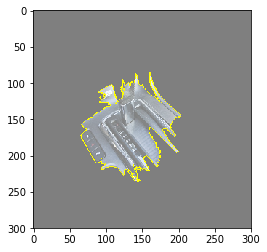

In [0]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

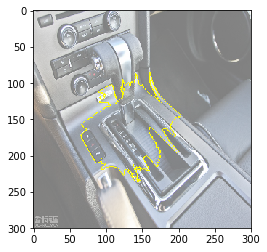

In [0]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

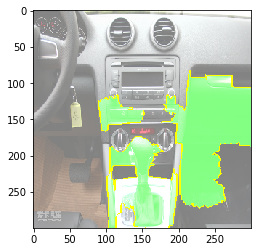

In [0]:
#we can change the number of top features 
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))